In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Dust Settling 

## Epstein drag

In the lectures, we derived the equation of motion for dust particles undergoing vertical settling with Epstein drag:
\\[\ddot z + \Omega^2z + \Omega \dot z /\mathrm{St}=0,\\]
where $\mathrm{St}$ is the Stokes number. The figure below shows the vertical position of a particle as a function of time, where the particle starts with no vertical velocity. Note that the units of length are arbitrary, since the equation of motion does not contain any length scale. The scale height \\(H\\) was chosen for convenience when comparing to the Stokes regime (see below).

FloatSlider(value=0.1, continuous_update=False, description='St:', max=10.0, min=0.001, readout_format='.3f', …

Output()

<IPython.core.display.Javascript object>


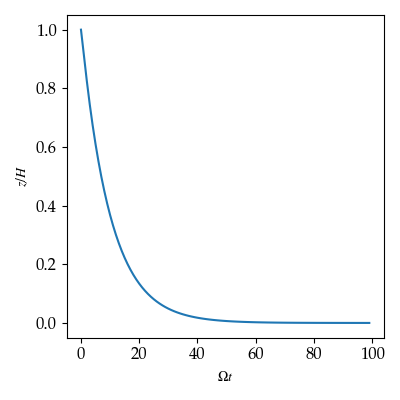

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, update_display, HTML
import ipywidgets as widgets

# Try and make plots look nice
plt.rcParams["font.family"] = 'serif'
plt.rcParams["mathtext.fontset"] = 'stix'
plt.rcParams["font.serif"] = 'Palatino'
plt.rcParams['pdf.fonttype'] = 42
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

w_st = widgets.FloatSlider(
    value=0.1,
    min=0.001,
    max=10,
    step=0.01,
    description='St:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

# Display eccentricity slider
output = widgets.Output()
display(w_st, output)

def disp_k(St):
    det = np.sqrt(1 - 4*St*St + 0.0j)
    
    return 0.5*(-1 + det)/St, 0.5*(-1 - det)/St

def z(t, St, vz0=0.0):
    k1, k2 = disp_k(St)
    
    A = (vz0 - k2)/(k1 - k2)
    B = 1 - A
    
    return A*np.exp(k1*t) + B*np.exp(k2*t)

Stokes = 0.1

fig = plt.figure(figsize=(4,4),num='Epstein drag')
ax = plt.gca()

k1, k2 = disp_k(Stokes)
maxt = 10*np.max([1/np.abs(k1), 1/np.abs(k2)])
        
t = np.linspace(0, maxt, 100)
f = z(t, Stokes)

ax.set_xlabel(r'$\Omega t$')
ax.set_ylabel(r'$z/H$')

line, = ax.plot(t, np.real(f));

plt.tight_layout()
    
def on_value_change_st(change):
    with output:
        global Stokes
        Stokes = change['new']
         
        k1, k2 = disp_k(Stokes)
        maxt = 5*np.max([1/np.abs(np.real(k1)), 1/np.abs(np.real(k2))]) + 1/Stokes
        
        t = np.linspace(0, maxt, 100)
        f = z(t, Stokes)

        line.set_data(t, np.real(f));

        ax.relim()
        ax.autoscale()
        plt.tight_layout()
 
w_st.observe(on_value_change_st, names='value')


1. For \\(\mathrm{St} \lesssim 1\\), can you see the point where the particle reaches terminal velocity?
2. For what value of \\(\mathrm{St}\\) does the particle reach the region \\(|z| < 0.1H\\) **and subsequently stays there**?
3. How do these results compare with question 2 of Exercise sheet 7?

## Stokes drag

In question 3 of Exercise sheet 7, the equation of motion for particles undergoing settling and Stokes drag was derived:
\\[\ddot u + u + |\dot u| \dot u = 0,\\]
where \\(u = 3C_D\rho z/(8s\rho_m)\\) and the time variable is \\(\tau=\Omega t\\). Here, \\(C_D\\) is the drag coefficient, \\(\rho\\) is the gas density, \\(s\\) is particle size and \\(\rho_m\\) is the material density. Note that this equation has **no** parameters: its behaviour is completely determined by the initial conditions (i.e. starting location and starting velocity). In the figure below the numerical solution is shown, and you can vary the initial value of \\(u\\), always taking the initial velocity to be zero.

FloatSlider(value=1.0, continuous_update=False, description='$u_0$:', max=20.0, min=0.1, readout_format='.3f',…

Output()

/Users/sjp/python/epad_core/epad_venv/lib/python3.9/site-packages/scipy/integrate/_ode.py:1181: UserWarning: dopri5: step size becomes too small
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


<IPython.core.display.Javascript object>


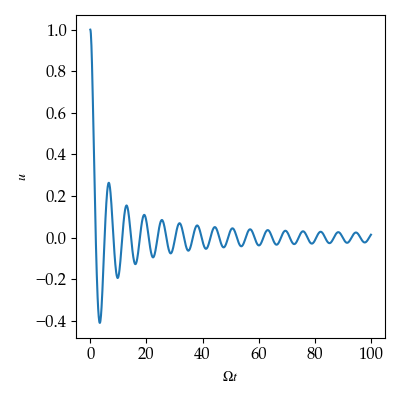

In [3]:
from scipy.integrate import ode

w_u0 = widgets.FloatSlider(
    value=1,
    min=0.1,
    max=20,
    step=0.01,
    description=r'$u_0$:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

# Display eccentricity slider
display(w_u0, output)

def f(t, y):
    return [y[1], -y[0]-np.abs(y[1])*y[1]]

u0 = 1.0
y0, t0 = [u0, 0.0], 0
r = ode(f).set_integrator('dopri5')
r.set_initial_value(y0, t0)

maxt = 100
t = np.linspace(0, maxt, 1000)
u = 0.0*t

for i in range(0, len(t)):
    u[i] = r.integrate(t[i])[0]

fig2 = plt.figure(figsize=(4,4),num='Stokes drag')
ax2 = plt.gca()

ax2.set_xlabel(r'$\Omega t$')
ax2.set_ylabel(r'$u$')

line2, = ax2.plot(t, u);

plt.tight_layout()

def on_value_change_u0(change):
    with output:
        global u0
        u0 = change['new']
         
        y0, t0 = [u0, 0.0], 0
        r = ode(f).set_integrator('dopri5')
        r.set_initial_value(y0, t0)

        maxt = 100
        t = np.linspace(0, maxt, 1000)
        u = 0.0*t

        for i in range(0, len(t)):
            u[i] = r.integrate(t[i])[0]

        line2.set_data(t, u);

        ax2.relim()
        ax2.autoscale()
        plt.tight_layout()
 
w_u0.observe(on_value_change_u0, names='value')


Ignoring constants of order unity (such as \\(C_D\\)), the relation between \\(z\\) and \\(u\\) is simply:
\\[ \frac{z}{H} \approx \mathrm{St} ~u,\\]
where \\(H\\) is the scale height of the disc. If we for simplicity put the particle at \\(z=H\\), initially, this means that the initial value for \\(u\\) is \\(u(0) = 1/\mathrm{St}\\). This way, we can easily construct a similar figure as for Epstein drag: 

FloatSlider(value=0.1, continuous_update=False, description='St:', max=10.0, min=0.001, readout_format='.3f', …

Output()

/Users/sjp/python/epad_core/epad_venv/lib/python3.9/site-packages/scipy/integrate/_ode.py:1181: UserWarning: dopri5: step size becomes too small
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


<IPython.core.display.Javascript object>


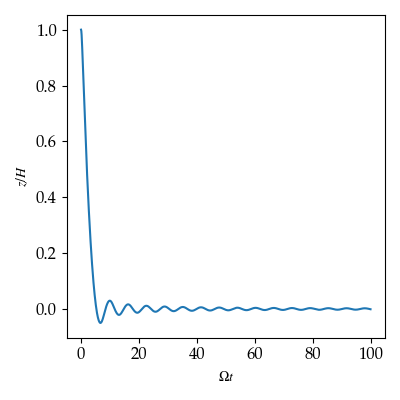

In [4]:
w_st3 = widgets.FloatSlider(
    value=0.1,
    min=0.001,
    max=10,
    step=0.01,
    description='St:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

# Display eccentricity slider
display(w_st3, output)

Stokes3 = 0.1
u0 = 1.0/Stokes3

y0, t0 = [u0, 0.0], 0
r = ode(f).set_integrator('dopri5')
r.set_initial_value(y0, t0)

maxt = 100
t = np.linspace(0, maxt, 1000)
u = 0.0*t

for i in range(0, len(t)):
    u[i] = r.integrate(t[i])[0]

fig3 = plt.figure(figsize=(4,4),num='Stokes Drag II')
ax3 = plt.gca()

ax3.set_xlabel(r'$\Omega t$')
ax3.set_ylabel(r'$z/H$')

line3, = ax3.plot(t, u*Stokes3);

plt.tight_layout()

def on_value_change_st3(change):
    with output:
        global Stokes3
        Stokes3 = change['new']
         
        u0 = 1/Stokes3
        y0, t0 = [u0, 0.0], 0
        r = ode(f).set_integrator('dopri5')
        r.set_initial_value(y0, t0)

        maxt = 100
        t = np.linspace(0, maxt, 1000)
        u = 0.0*t

        for i in range(0, len(t)):
            u[i] = r.integrate(t[i])[0]

        line3.set_data(t, u*Stokes3);

        ax3.relim()
        ax3.autoscale()
        plt.tight_layout()
 
w_st3.observe(on_value_change_st3, names='value')


How do the particle trajectories compare between Epstein drag and Stokes drag? How does this depend on Stokes number?